# Početna analiza

Prije učenja klasifikatora, izvršit ćemo neke jednostavnije analize skupa za učenje kako bismo vidjeli kakvim podatcima raspolažemo i eventualno uočili neka pravila ili međusobne ovisnosti svojstava i ishoda. Također, na skupu primjera za učenje želimo provjeriti neke tvrdnje koje smatramo zanimljivima i korisnima za daljnje istraživanje. 

Na početku, prikazujemo podjelu skupa na vrste životinja.

U skupu za ucenje imamo 58.34486886901867% pasa i 41.65513113098133% macaka.


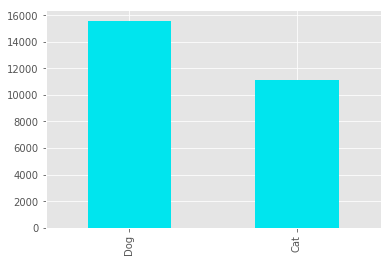

In [48]:
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

train_data = pd.read_csv('data/clean_train.csv', encoding="ISO-8859-1")

animalType = train_data['AnimalType'].value_counts()
animalType.plot(kind='bar', color='#00E5EE')

dog_percentage = (len(train_data[train_data['AnimalType'] == 'Dog']) * 100)/len(train_data)
cat_percentage = (len(train_data[train_data['AnimalType'] == 'Cat']) * 100)/len(train_data)

print("U skupu za ucenje imamo " + str(dog_percentage) + "% pasa i " 
      + str(cat_percentage) + "% macaka.")

Pogledajmo sada i klase u koje su životinje svrstane te njihovu zastupljenost u skupu za učenje.

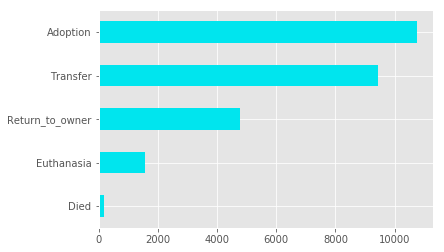

In [49]:
outcomeType = train_data.OutcomeType.value_counts().sort_values()
outcomeType.plot(kind='barh', color='#00E5EE')

Na sljedećem su grafu prikazane podjele pasa i mačaka na navedenih pet klasa.

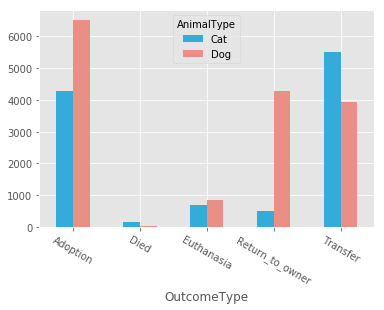

In [50]:
animalTypeOutcome = train_data[['AnimalType','OutcomeType']].groupby(['OutcomeType','AnimalType']).size().unstack()

animalTypeOutcome.plot(kind='bar',color=['#34ABD8','#E98F85'],rot=-30)

In [51]:
# show the percentage of adopted dogs and adopted cats
dogs = train_data[train_data['AnimalType'] == 'Dog']
cats = train_data[train_data['AnimalType'] == 'Cat']
num_dogs = len(dogs)
num_cats = len(cats)
adoption_per_dogs = (100 * len(dogs[dogs['OutcomeType'] == 'Adoption']))/num_dogs
adoption_per_cats = (100 * len(cats[cats['OutcomeType'] == 'Adoption']))/num_cats

print(str(adoption_per_dogs) + "% of dogs have been adopted")
print(str(adoption_per_cats) + "% of cats have been adopted")

41.66078871433152% of dogs have been adopted
38.368959942518416% of cats have been adopted


Dakle, oko 41,7% pasa i oko 38,4% mačaka klasificirano je kao 'Adoption'. Prikažimo klasu 'Adoption':

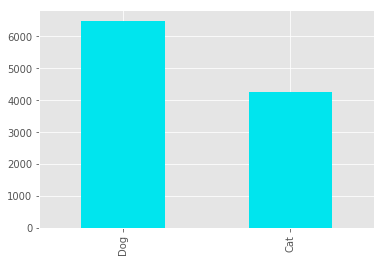

In [52]:
adopted = train_data[train_data['OutcomeType'] == 'Adoption']
adopted_type = adopted['AnimalType'].value_counts()
adopted_type.plot(kind='bar', color='#00E5EE')

Pogledajmo koliki je postotak pasa i mačaka u prikazanoj klasi. Ako je sličan onome u početnom skupu (što se po grafovima čini da jest), onda možemo reći da je za pse i mačke vjerojatnost usvajanja podjednaka.

In [53]:
adopted_dog_percentage = (len(adopted[adopted['AnimalType'] == 'Dog']) * 100)/len(adopted)
adopted_cat_percentage = (len(adopted[adopted['AnimalType'] == 'Cat']) * 100)/len(adopted)

print("U skupu klasificaranom s \'Adoption\' imamo " + str(adopted_dog_percentage) + "% pasa i " 
      + str(adopted_cat_percentage) + "% macaka.")

U skupu klasificaranom s 'Adoption' imamo 60.33057851239669% pasa i 39.66942148760331% macaka.


Jedna je od naših tvrdnji bila da je vjerojatnost udomljavanja za pse i mačke podjednaka, što smatramo potvrđenim na danom skupu za učenje.

Sljedeće što nas zanima jest možemo li davanjem imena životinji povećati vjerojatnost pozitivnog ishoda. Inače ćemo pozitivnim ishodom smatrati udomljavanje i povratak vlasniku, no u ovom ćemo slučaju zasebno provjeravati svaku klasu. Naime, smatramo da, ukoliko je životinja već imala i vlasnika i vlasnik joj je dao ime, ono ime koje je dobila u skloništu neće utjecati na njezin povratak vlasniku.

## Svojstvo prisustva imena

Pogledajmo prvo koliko životinja iz promatranog skupa za učenje ima ime.
Na grafu je prisustvo imena označeno s '1', a odsustvo s '0'.

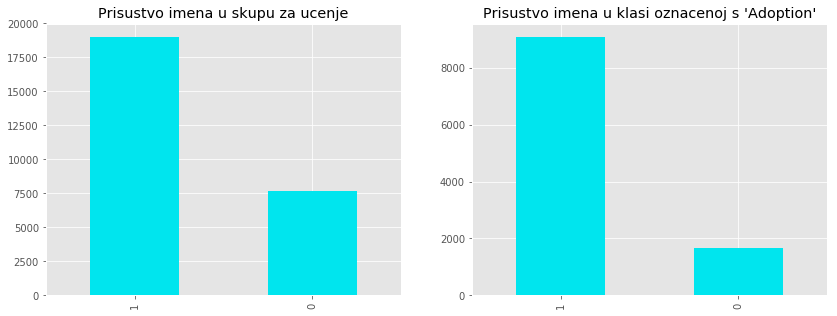

In [54]:
# first show how many animals of the given set have names
fig = plt.figure(figsize=(14,5))

named_distribution = train_data['hasName'].value_counts()
fig.add_subplot(1, 2, 1)
named_distribution.plot(kind='bar', color='#00E5EE', title='Prisustvo imena u skupu za ucenje')

adopted_named_distribution = adopted['hasName'].value_counts()
fig.add_subplot(1, 2, 2) 
adopted_named_distribution.plot(kind='bar', color='#00E5EE', 
                                                title='Prisustvo imena u klasi oznacenoj s \'Adoption\'')


Prema gornjim grafovima, mogli bismo reći da bi davanje imena životinji doista moglo poboljšati njezine šanse za udomljavanje. No, pogledajmo još kakva je točno distribucija po klasama za imenovane i neimenovane životinje.

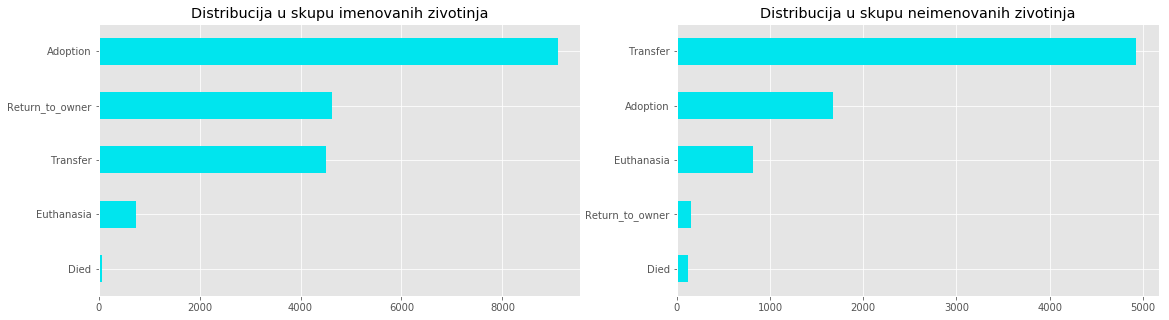

In [55]:
fig = plt.figure(figsize=(19, 5))

outcomeTypeNamed = train_data[train_data['hasName'] == 1].OutcomeType.value_counts().sort_values()
outcomeTypeNotNamed = train_data[train_data['hasName'] == 0].OutcomeType.value_counts().sort_values()

fig.add_subplot(1, 2, 1)
outcomeTypeNamed.plot(kind='barh', color='#00E5EE', title='Distribucija u skupu imenovanih zivotinja')

fig.add_subplot(1, 2, 2)
outcomeTypeNotNamed.plot(kind='barh', color='#00E5EE', title='Distribucija u skupu neimenovanih zivotinja')

Vidimo da je poredak ishoda pogodniji za životinje koje imaju ime. Ima smisla da je najveći broj neimenovanih životinja prebačen u drugo sklonište. Tamo će onda dobiti ime. Ipak, vidimo da ima životinja bez imena koje jesu udomljene pa možda ne bi bilo loše da, dok čekaju svoj transfer, dobiju neko ime za bolju reklamu. Veće su šanse da im možda uopće neće trebati transfer.
Što se tiče eutanazije, ona uzima više maha u skupu neimenovanih životinja. To bi moglo biti i zato što su to vjerojatno tek nađene životinje, od kojih su mnoge ranjene ili neprilagođene pa ih se eutanazira prije nego što su imale priliku dobiti ime. 

## Starost životinje 

Jedna od hipoteza koje smo naveli u prijedlogu projektne teme jest da je za starije životinje veća vjerojatnost povratka vlasniku jer je vjerojatno povezanost između njih veća. U ovom ćemo dijelu istražiti općenito kako starost životinje utječe na ishode i provjeriti što podatci kažu o našoj hipotezi.

U očišćenom skupu podataka podatci o starosti su u danima radi preciznijeg učenja modela za klasifikaciju. Ovdje ćemo, radi jednostavnosti, koristiti podatke u godinama. 

In [61]:
print(train_data['AgeuponOutcome'].min())
print(train_data['AgeuponOutcome'].max()/365)

0
20.0


Dakle, starost životinja kreće se od 0 do 20 godina. Pogledajmo kako su početni podatci podijeljeni s obzirom na starost.

<BarContainer object of 2 artists>

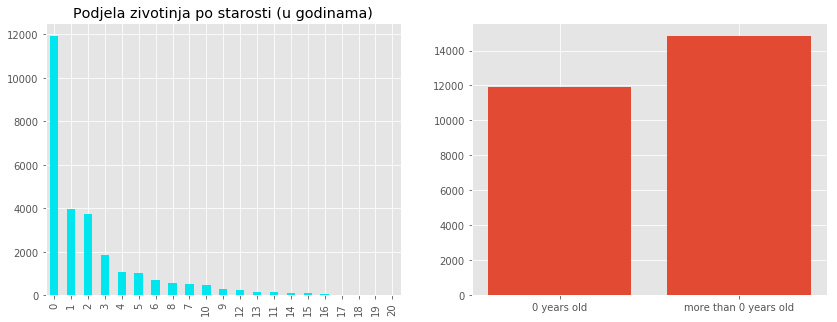

In [112]:
fig = plt.figure(figsize=(14, 5))

age = (train_data['AgeuponOutcome']/365).astype(int)
age_values = age.value_counts()
fig.add_subplot(1, 2, 1)
age_values.plot(kind='bar', color='#00E5EE', title='Podjela zivotinja po starosti (u godinama)')

fig.add_subplot(1, 2, 2)
x =['0 years old', 'more than 0 years old']
plt.bar(x, height=[(age == 0).sum(), (age != 0).sum()])

Vidimo da je najzastupljenija skupina štenaca i mačića mlađih od godinu dana. Iz gornjih grafova zaključujemo da ima smisla početni skup podijeliti na životinjice starosti do godinu dana i na ostatak. Prikazujemo distribucije tih dviju skupina.

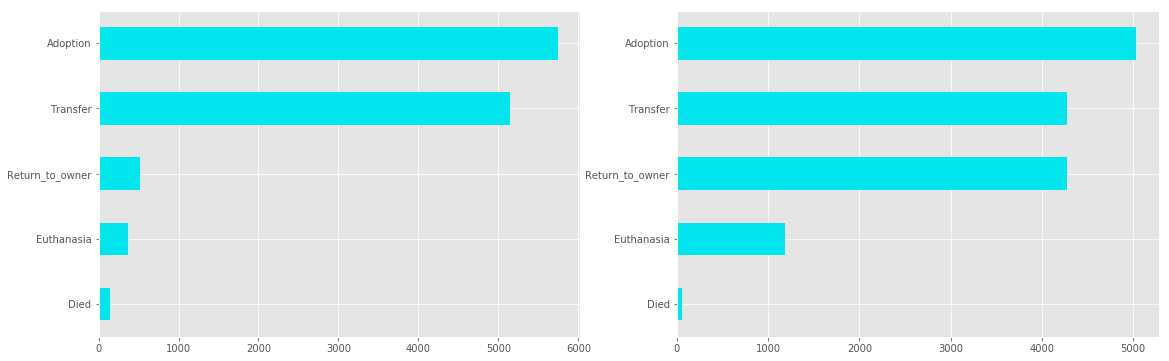

In [106]:
fig = plt.figure(figsize=(19, 6))

younger = train_data[train_data['AgeuponOutcome']/365 < 1].OutcomeType.value_counts().sort_values()
older = train_data[train_data['AgeuponOutcome']/365 >= 1].OutcomeType.value_counts().sort_values()

fig.add_subplot(1, 2, 1)
younger.plot(kind='barh', color='#00E5EE')

fig.add_subplot(1, 2, 2)
older.plot(kind='barh', color='#00E5EE')

Na gornjim je grafovima očito da je vjerojatnost povratka vlasniku doista veća za životinje starije od godinu dana. Provjerimo još što se "starijoj" skupini događa ako izuzmemo vrlo mlade pse i mačke, tj. ako uzmemo životinje starosti npr. 3 godine i više.

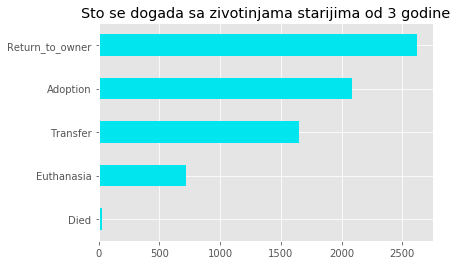

In [108]:
older = train_data[train_data['AgeuponOutcome']/365 >= 3].OutcomeType.value_counts().sort_values()
older.plot(kind='barh', color='#00E5EE', title='Sto se dogada sa zivotinjama starijima od 3 godine')

Ovime smatramo našu hipotezu da je vjerojatnost povratka starije životinje vlasniku veća potvrđenom. 

<BarContainer object of 2 artists>

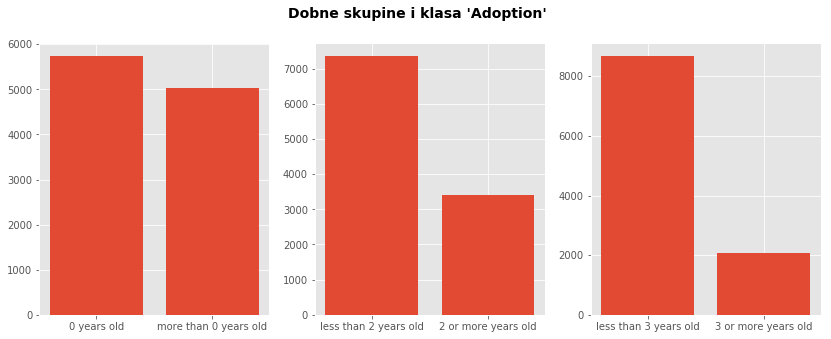

In [120]:
fig = plt.figure(figsize=(14, 5))
fig.suptitle('Dobne skupine i klasa \'Adoption\'', fontsize=14, fontweight='bold')

# two age groups in the class 'Adoption'
# first, group 0 or more years old
adoption_young = adopted[adopted['AgeuponOutcome']/365 < 1]
adoption_old = adopted[adopted['AgeuponOutcome']/365 >= 1]

fig.add_subplot(1, 3, 1)
x = ['0 years old', 'more than 0 years old']
plt.bar(x, height=[len(adoption_young), len(adoption_old)])

# 2 years old
adoption_young = adopted[adopted['AgeuponOutcome']/365 < 2]
adoption_old = adopted[adopted['AgeuponOutcome']/365 >= 2]

fig.add_subplot(1, 3, 2)
x = ['less than 2 years old', '2 or more years old']
plt.bar(x, height=[len(adoption_young), len(adoption_old)])

# 3 years old
adoption_young = adopted[adopted['AgeuponOutcome']/365 < 3]
adoption_old = adopted[adopted['AgeuponOutcome']/365 >= 3]

fig.add_subplot(1, 3, 3)
x = ['less than 3 years old', '3 or more years old']
plt.bar(x, height=[len(adoption_young), len(adoption_old)])


Dobiveni su rezultati očekivani, ali i poučni. Govore nam kako već životinje koje napune dvije godine imaju znatno manju šansu udomljavanja, dakle već se njima treba posvetiti više pažnje. Smatramo da je to korisna informacija. Ljudi više vole udomljavati mlađe životinje, ali i životinje stare 2 ili 3 godine još su uvijek mlade. Mišljenja smo da bi se broj udomljavanja u tim skupinama mogao povećati nekim akcijama upoznavanja, reklamama i slično.